In [15]:
#Dane są zebrane w pliku Samsung_HAR.zip. Należy je rozpakować i przeanalizować.

#Obróbka danych wejściowych:

#    Czy potrzeba wszystkich cech?
#    Nie potrzebujemy wszystkich cech ze względu na to, że niektóre z nich się powtarzają. Dodatkowo ze względu na użycie unsupervised learning możemy usunąć
#    cechy najbardziej skorelowane ze sobą.


##    Czy potrzebna jest jakaś obróbka?
#    Dane potrzebują obróbki z tego względu, że niektóe cechy się powtarzają, musimy też dodać cechę do zbioru danych z pliku *labels.
#    Standaryzacja / normalizacja cech (bo wiele algorytmów klasteryzacji jest wrażliwych na skalę).
#    Sprawdzenie brakujących danych i ich uzupełnienie lub usunięcie



#    Czy wiemy, jak obrobić?
#    Średnio, ponieważ nie mamy nazw cech, traktujemy wszystkie kolumny jako równorzędne liczby → skalujemy wszystko jednakowo.

#    Czy wiemy, co jaka cecha znaczy?
     #Nie wiemy co która checha oznacza. Jednakże w zwiąsku z tym że robimy uczenie nienadzorowane nie jest konieczna znajomość oznaczeń cech.

#    Czy potrzebujemy aż dwóch plików?
#    Nie.W unsupervised learning jeden plik danych wystarczy.Jeśli mamy osobno dane testowe i treningowe, to możesz je połączyć — brak etykiet,
#    które można sprawdzić (nie robię klasyfikacji).

#    Pamiętajmy, że mamy do czynienia z Unsupervised Learning. Czy podział na dane testowe i treningowe jest potrzebny,
#    jeśli tak to dlaczego, jeśli nie to dlaczego?
#    Nie, nie jest potrzebny ze względu na to, że w unsupervised learning nie ma etykiet, więc nie ma jak ocenić dokładności modelu na zbiorze testowym.



#Do zrobienia:

#    Użyj poznanych metod klasteringu, aby podzielić dany zbiór (pamiętaj o skalowaniu itp.).

#    Zwizualizuj podział przez każdy algorytm (możesz użyć metod z notatników).

#    Z jakim typem czynności algorytmy poradziły sobie super, z jakim nie najlepiej. Typy czynności (dane zawarte w plikach *labels):
#        – marsz
#        – wchodzenie w górę po schodach
#        – schodzenie w dół ze schodów
#        – siedzenie
#        – stanie
#        – leżenie

#    Dobierz prawidłową ilość klastrów w przypadku metody KMeans.

#    Na danym zbiorze dokonaj preprocessingu, używając metod klasteringu. Następnie wyszkol dwa wybrane przez siebie klasyfikatory typu Supervised Learning i spróbuj uzyskać jak najlepszy wynik, używając wszystkich znanych sobie "wspomagaczy".


import pandas as pd
activity_mapping = {
    1: 'marsz',
    2: 'wchodzenie po schodach',
    3: 'schodzenie ze schodów',
    4: 'siedzenie',
    5: 'stanie',
    6: 'leżenie'
}


test_data = pd.read_csv('samsung_test.txt', sep='\s+', header=None)
train_data = pd.read_csv('samsung_train.txt', sep='\s+', header=None)
test_labels = pd.read_csv('samsung_test_labels.txt', sep='\s+', header=None, names=['Activity'])
train_labels = pd.read_csv('samsung_train_labels.txt', sep='\s+', header=None, names=['Activity'])

test = pd.concat([test_data, test_labels], axis=1)
train = pd.concat([train_data, train_labels], axis=1)
data = pd.concat([train, test], axis=0).reset_index(drop=True)
#data['ActivityName'] = data['Activity'].map(activity_mapping)
data

<>:42: SyntaxWarning: invalid escape sequence '\s'
<>:43: SyntaxWarning: invalid escape sequence '\s'
<>:44: SyntaxWarning: invalid escape sequence '\s'
<>:45: SyntaxWarning: invalid escape sequence '\s'
<>:42: SyntaxWarning: invalid escape sequence '\s'
<>:43: SyntaxWarning: invalid escape sequence '\s'
<>:44: SyntaxWarning: invalid escape sequence '\s'
<>:45: SyntaxWarning: invalid escape sequence '\s'
C:\Users\DarkRaziel\AppData\Local\Temp\ipykernel_2736\1013943134.py:42: SyntaxWarning: invalid escape sequence '\s'
  test_data = pd.read_csv('samsung_test.txt', sep='\s+', header=None)
C:\Users\DarkRaziel\AppData\Local\Temp\ipykernel_2736\1013943134.py:43: SyntaxWarning: invalid escape sequence '\s'
  train_data = pd.read_csv('samsung_train.txt', sep='\s+', header=None)
C:\Users\DarkRaziel\AppData\Local\Temp\ipykernel_2736\1013943134.py:44: SyntaxWarning: invalid escape sequence '\s'
  test_labels = pd.read_csv('samsung_test_labels.txt', sep='\s+', header=None, names=['Activity'])
C:\

,0,1,2,3,4,5,6,7,8,9,...,552,553,554,555,556,557,558,559,560,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,5
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,5
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,5
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,5
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10294,0.310155,-0.053391,-0.099109,-0.287866,-0.140589,-0.215088,-0.356083,-0.148775,-0.232057,0.185361,...,-0.376278,-0.750809,-0.337422,0.346295,0.884904,-0.698885,-0.651732,0.274627,0.184784,2
10295,0.363385,-0.039214,-0.105915,-0.305388,0.028148,-0.196373,-0.373540,-0.030036,-0.270237,0.185361,...,-0.320418,-0.700274,-0.736701,-0.372889,-0.657421,0.322549,-0.655181,0.273578,0.182412,2
10296,0.349966,0.030077,-0.115788,-0.329638,-0.042143,-0.250181,-0.388017,-0.133257,-0.347029,0.007471,...,-0.118854,-0.467179,-0.181560,0.088574,0.696663,0.363139,-0.655357,0.274479,0.181184,2
10297,0.237594,0.018467,-0.096499,-0.323114,-0.229775,-0.207574,-0.392380,-0.279610,-0.289477,0.007471,...,-0.205445,-0.617737,0.444558,-0.819188,0.929294,-0.008398,-0.659719,0.264782,0.187563,2


In [10]:
data.shape

(10299, 562)

In [16]:
data_T = data.T
data_T = data_T.drop_duplicates()

# znowu odwracamy transpose
data = data_T.T

print(f"Nowy kształt danych: {data.shape}")

Nowy kształt danych: (10299, 541)


In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
data.columns = data.columns.astype(str)
scaler = StandardScaler()
X = scaler.fit_transform(data)


clf = KMeans(n_clusters=6, max_iter = 300)

# albo metody fit)predict, która łączy dwie powyższe
y_pred = clf.fit_predict(X)

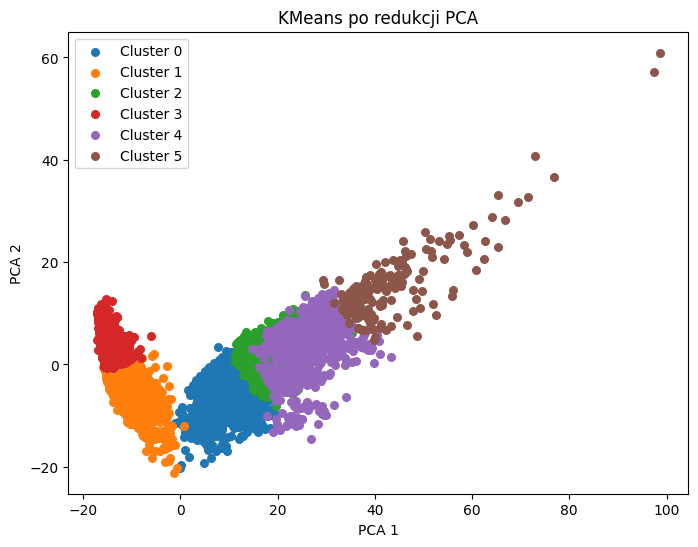

In [18]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

# Redukcja wymiarów (jeśli potrzeba)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Unikalne klastry
unique_clusters = np.unique(y_pred)

# Tworzenie scattera dla każdego klastra osobno
plt.figure(figsize=(8, 6))
for cluster in unique_clusters:
    plt.scatter(
        X_pca[y_pred == cluster, 0], 
        X_pca[y_pred == cluster, 1], 
        label=f'Cluster {cluster}',
        s=30
    )

plt.title('KMeans po redukcji PCA')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend()  # Dodajemy legendę
plt.show()

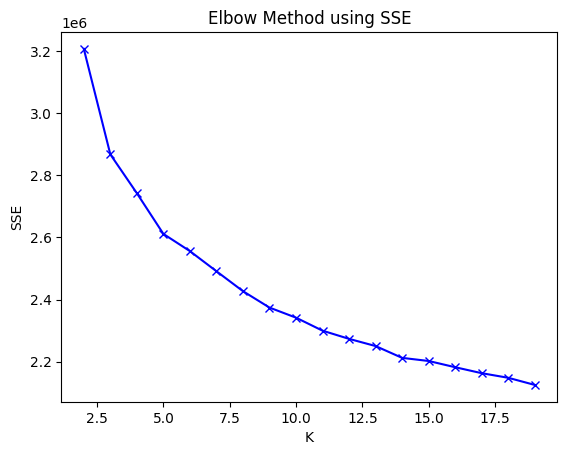

In [19]:
kmeans_per_k = [
    KMeans(n_clusters=k, random_state=2).fit(X)
    for k in range(2, 20) # zaczynamy od wartości n_clusters wynoszącej 2, gdyż nie ma sensu dzielenia zbioru dla 1 klastra
    ]
inertias = [model.inertia_ for model in kmeans_per_k]
plt.plot(range(2, 20), inertias, 'bx-')
plt.xlabel('K')
plt.ylabel('SSE')
plt.title('Elbow Method using SSE')
plt.show()

#Na wykresie wyraźnie widać, że największa zmiana tempa spadku następuje w okolicach K = 5. Od tego momentu spadki SSE są mniejsze i bardziej liniowe.
#Zatem najlepsza liczba klastrów to 5.

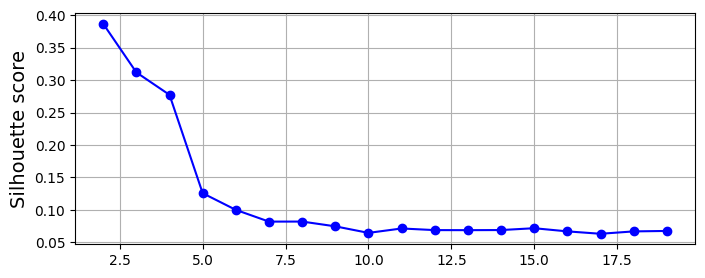

In [20]:
from sklearn.metrics import silhouette_score
# Zakładam, że masz modele dla range(2, 20)
k_values = range(2, 20)  # zmień zakres na zgodny z kmeans_per_k

silhouette_scores = [
    silhouette_score(X, model.labels_)
    for model in kmeans_per_k
]

plt.figure(figsize=(8, 3))
plt.plot(k_values, silhouette_scores, "bo-")
plt.ylabel("Silhouette score", fontsize=14)
plt.grid()
plt.show()

#Najwyższy silhouette score jest dla K = 2 — około 0.39. To oznacza, że 2 klastry dają najbardziej zwartą i najlepiej oddzieloną strukturę.
#Dla K = 3 i K = 4 score też jest dość przyzwoity (ok. 0.30 i 0.28), ale potem gwałtownie spada dla K ≥ 5.
#Od K = 5 wzwyż silhouette score jest niski (poniżej 0.15) i utrzymuje się na niskim poziomie. To sugeruje, że klasteryzacja na więcej niż 4-5 klastrów nie daje już wyraźnie oddzielonych grup.

C:\Users\DarkRaziel\AppData\Local\Temp\ipykernel_2736\164141317.py:32: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(X_plot[mask, 0], X_plot[mask, 1],


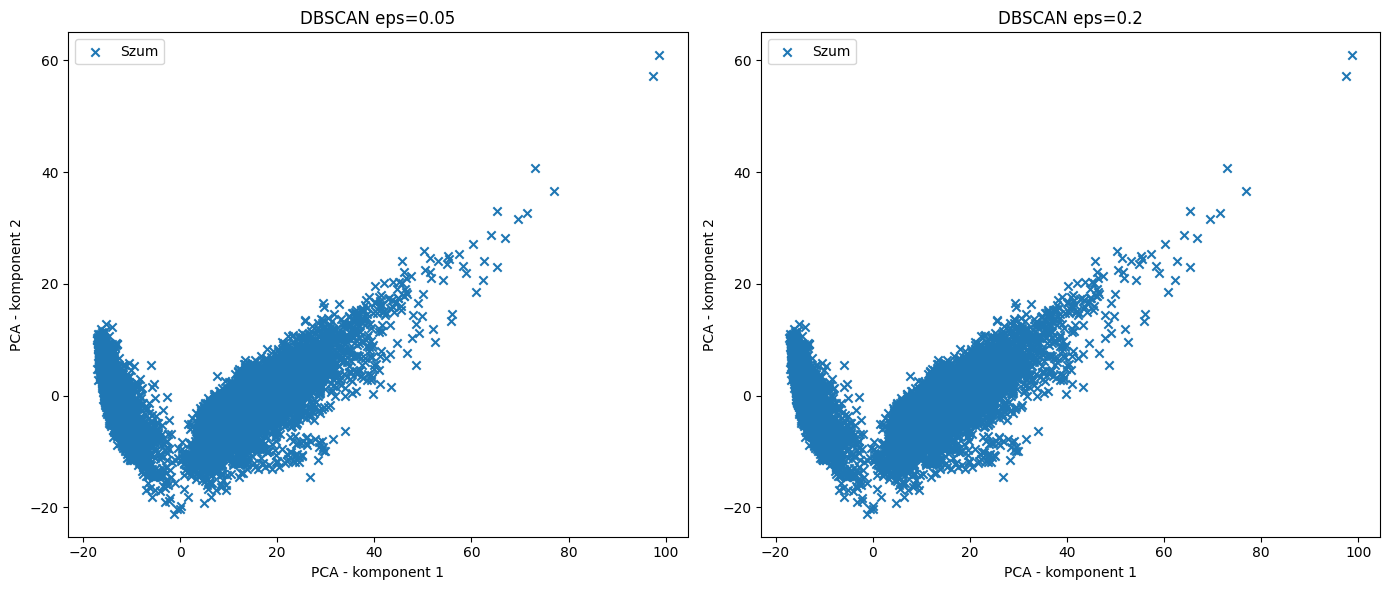

In [22]:
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA

# Zakładając, że masz dane X (przykład):
# X = np.random.rand(100, 5)  # Przykładowe dane, jeśli jeszcze ich nie masz

# Redukcja do 2 wymiarów
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

# Trenowanie na oryginalnych danych
dbscan = DBSCAN(eps=0.05, min_samples=5)
dbscan.fit(X)

dbscan_2 = DBSCAN(eps=0.2, min_samples=5)
dbscan_2.fit(X)

# Funkcja pomocnicza do rysowania
def plot_dbscan(ax, X_plot, labels, title):
    unique_labels = np.unique(labels)
    colors = plt.cm.tab10(np.linspace(0, 1, len(unique_labels)))

    for label, color in zip(unique_labels, colors):
        mask = (labels == label)
        if label == -1:
            label_name = "Szum"
            marker = "x"
        else:
            label_name = f"Klaster {label}"
            marker = "o"
        
        ax.scatter(X_plot[mask, 0], X_plot[mask, 1], 
                   c=[color], marker=marker, label=label_name, edgecolors='k')

    ax.set_title(title)
    ax.set_xlabel("PCA - komponent 1")
    ax.set_ylabel("PCA - komponent 2")
    ax.legend()

# Rysowanie
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

plot_dbscan(axes[0], X_reduced, dbscan.labels_, 'DBSCAN eps=0.05')
plot_dbscan(axes[1], X_reduced, dbscan_2.labels_, 'DBSCAN eps=0.2')

plt.tight_layout()  # Poprawione: brak podkreślenia
plt.show()



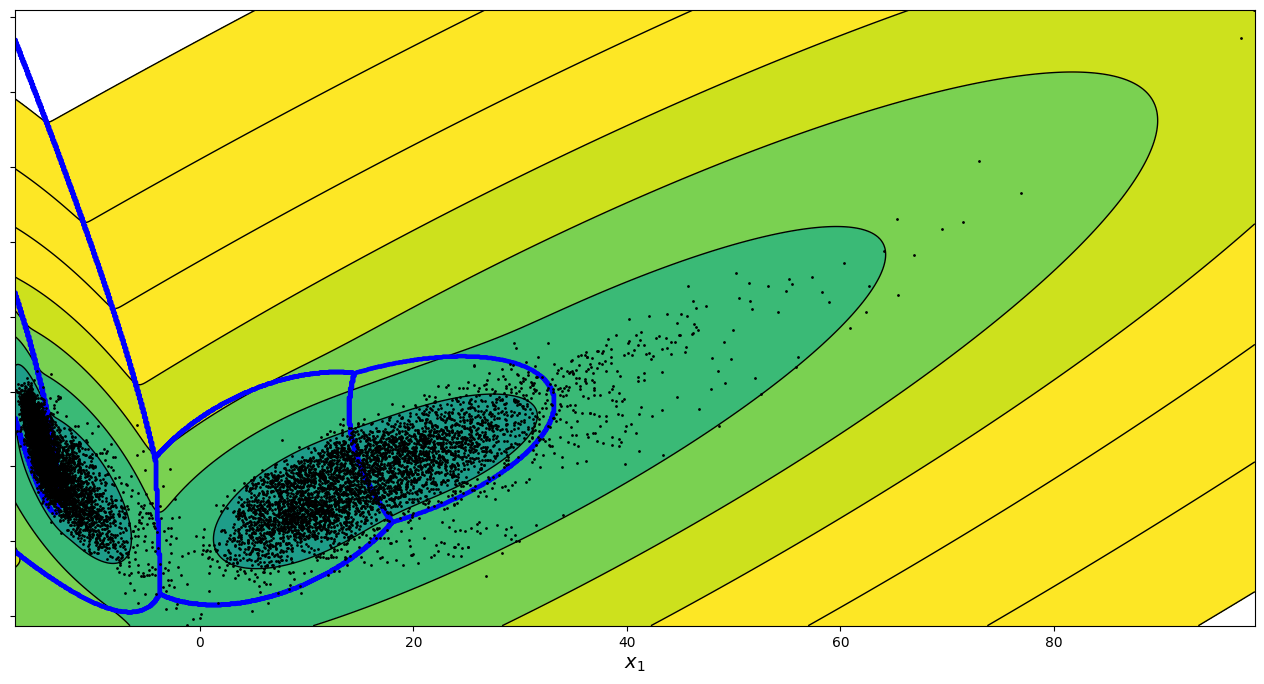

In [28]:
from sklearn.mixture import GaussianMixture
from matplotlib.colors import LogNorm

gm = GaussianMixture(n_components=5, n_init=10, random_state=42)
gm.fit(X_reduced)
def plot_gaussian_mixture(clf, X, resolution=1000):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = -clf.score_samples(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z,
                 norm=LogNorm(vmin=1.0, vmax=30.0),
                 levels=np.logspace(0, 2, 12))
    plt.contour(xx, yy, Z,
                norm=LogNorm(vmin=1.0, vmax=30.0),
                levels=np.logspace(0, 2, 12),
                linewidths=1, colors='k')

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z, linewidths=3, colors='b')
    
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

    plt.xlabel("$x_1$", fontsize=14)
    plt.tick_params(labelleft=False)


plt.figure(figsize=(16, 8))

plot_gaussian_mixture(gm, X_reduced)
plt.show()


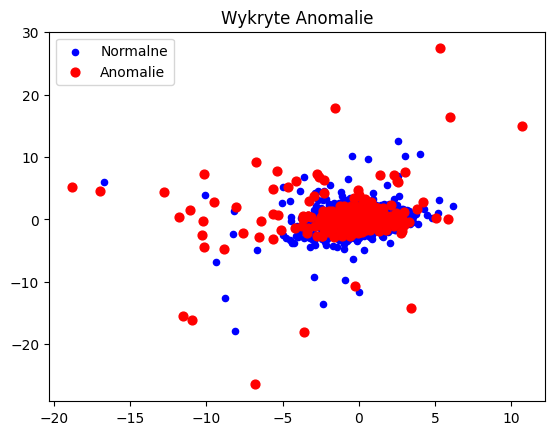

In [32]:
#GMM
density = gm.score_samples(X_reduced)
threshold = np.percentile(density, 5)
anomalie = X[density < threshold]

plt.scatter(X[:, 0], X[:, 1], color='blue', label='Normalne', s=20)
plt.scatter(anomalie[:, 0], anomalie[:, 1], color='red', label='Anomalie', s=40)
plt.legend()
plt.title('Wykryte Anomalie')
plt.show()

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin



In [35]:
# Przygotowanie danych
features = data.iloc[:, :540]  # Zakładając, że masz 540 kolumn z cechami
y_data = data.iloc[:, 540]  # Zakładając, że ostatnia kolumna to etykiety

X_train, X_test, y_train, y_test = train_test_split(features, y_data, random_state=2)

# Tworzymy pipeline
pipeline = Pipeline([
    ("scaler", StandardScaler()),  # Skalowanie danych
    ("kmeans", KMeans(random_state=2)),  # KMeans
    ("log_reg", LogisticRegression(multi_class="ovr", max_iter=5000, random_state=2)),  # Model
])

# Parametry do przeszukania w GridSearch
param_grid = {
    "kmeans__n_clusters": [3, 6, 8, 10],  # Testujemy różne liczby klastrów
    "log_reg__C": [0.1, 1, 10],  # Regularization parameter for LogisticRegression
    "log_reg__solver": ["liblinear", "lbfgs"],  # Różne algorytmy optymalizacji dla LogisticRegression
}

# Definiujemy KFold
kfold = KFold(n_splits=5, shuffle=True, random_state=2)  # 5-fold cross-validation

# GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=kfold, scoring='accuracy', n_jobs=-1)

# Uczenie z GridSearch
grid_search.fit(X_train, y_train)

# Wyniki
print("Najlepsze parametry:", grid_search.best_params_)
print("Najlepszy wynik:", grid_search.best_score_)

# Ocena na zbiorze testowym
best_model = grid_search.best_estimator_  # Najlepszy model
test_score = best_model.score(X_test, y_test)
print("Wynik na zbiorze testowym:", test_score)

C:\Users\DarkRaziel\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


Najlepsze parametry: {'kmeans__n_clusters': 10, 'log_reg__C': 10, 'log_reg__solver': 'lbfgs'}
Najlepszy wynik: 0.825998625014672
Wynik na zbiorze testowym: 0.8279611650485437


In [38]:
log_reg = LogisticRegression(multi_class="ovr", max_iter=5000, random_state=2)
log_reg.fit(X_train, y_train)
wynik__bez_Klasteryzacji = log_reg.score(X_test, y_test)
print("Bez KMeans :", wynik__bez_Klasteryzacji)

C:\Users\DarkRaziel\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


Bez KMeans : 0.9879611650485437


In [39]:
from sklearn.neighbors import KNeighborsClassifier
pipeline = Pipeline([
    ("scaler", StandardScaler()),  # Skalowanie danych
    ("kmeans", KMeans(random_state=2)),  # KMeans
    ("knn", KNeighborsClassifier())  # Zmieniamy LogisticRegression na KNN
])

# Parametry do przeszukania w GridSearch
param_grid = {
    "kmeans__n_clusters": [3, 5, 6, 8, 10],  # Testujemy różne liczby klastrów
    "knn__n_neighbors": [3, 5, 7],  # Testujemy różną liczbę sąsiadów dla KNN
    "knn__weights": ["uniform", "distance"],  # Różne sposoby ważenia sąsiadów
}

# Definiujemy KFold
kfold = KFold(n_splits=5, shuffle=True, random_state=2)  # 5-fold cross-validation

# GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=kfold, scoring='accuracy', n_jobs=-1)

# Uczenie z GridSearch
grid_search.fit(X_train, y_train)

# Wyniki
print("Najlepsze parametry:", grid_search.best_params_)
print("Najlepszy wynik:", grid_search.best_score_)

# Ocena na zbiorze testowym
best_model = grid_search.best_estimator_  # Najlepszy model
test_score = best_model.score(X_test, y_test)
print("Wynik na zbiorze testowym:", test_score)

Najlepsze parametry: {'kmeans__n_clusters': 10, 'knn__n_neighbors': 7, 'knn__weights': 'distance'}
Najlepszy wynik: 0.8011421600684139
Wynik na zbiorze testowym: 0.8174757281553398


In [15]:
#Z jakim typem czynności algorytmy poradziły sobie super, z jakim nie najlepiej. Typy czynności (dane zawarte w plikach *labels):

#Model najgorzej poradził sobie z określeniem czy ktoś stoi czy siedzi. Najlepiej poradził sobie z określeniem schodzenie w dół ze schodów.
# RegresjaLogistyczna radziłą sobie dużo lepiej bez preprocesowania za pomocą kmeans.

#czym różni się KMeans, K-fold i K Nearest Neighbors:
#KMeans → Grupowanie danych (klasteryzacja, nienadzorowane).

#K-Fold → Walidacja modelu (ocena wydajności, technika kros-walidacji).

#KNN → Klasyfikacja lub regresja (sąsiedztwo najbliższych punktów, nadzorowane).

In [40]:
print("Niestety pomimo klasteringu wynik był gorszy",test_score, "w porównaniu do czystej regresji logistycznej", wynik__bez_Klasteryzacji)

Niestety pomimo klasteringu wynik był gorszy 0.8174757281553398 w porównaniu do czystej regresji logistycznej 0.9879611650485437
